<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/2_function_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation
## 1. Regression with One Variable
- Regression:
  - Process of training a model to predict a **continuous** numerical output based on one or more input features.
  - e.g.: Predicts the child's height based on the parent's height.
  - Why is it named "regression"?:
    - The term was first used by Sir Francis Galton, a British statistician and cousin of Charles Darwin, in the late 19th century. Galton was studying the relationship between heights of parents and their children. He observed that although tall parents often had tall children, the children's heights tended to "regress" towards the average or mean height of the population. Similarly, children of short parents were often short but their heights still regressed towards the average.

In [1]:
# Let's make function that works as f(x) = ax+b

a = 2
b = 0.5
def my_function(x):
  return a*x + b

my_function(1)

2.5

In [4]:
# Let's plot this function
# First, let's make many x candidates
# from -5 to 5, with 500 total x

xs = [i for i in range(500)]
xs = [(i-250)/50 for i in range(501)]
xs

[-5.0,
 -4.98,
 -4.96,
 -4.94,
 -4.92,
 -4.9,
 -4.88,
 -4.86,
 -4.84,
 -4.82,
 -4.8,
 -4.78,
 -4.76,
 -4.74,
 -4.72,
 -4.7,
 -4.68,
 -4.66,
 -4.64,
 -4.62,
 -4.6,
 -4.58,
 -4.56,
 -4.54,
 -4.52,
 -4.5,
 -4.48,
 -4.46,
 -4.44,
 -4.42,
 -4.4,
 -4.38,
 -4.36,
 -4.34,
 -4.32,
 -4.3,
 -4.28,
 -4.26,
 -4.24,
 -4.22,
 -4.2,
 -4.18,
 -4.16,
 -4.14,
 -4.12,
 -4.1,
 -4.08,
 -4.06,
 -4.04,
 -4.02,
 -4.0,
 -3.98,
 -3.96,
 -3.94,
 -3.92,
 -3.9,
 -3.88,
 -3.86,
 -3.84,
 -3.82,
 -3.8,
 -3.78,
 -3.76,
 -3.74,
 -3.72,
 -3.7,
 -3.68,
 -3.66,
 -3.64,
 -3.62,
 -3.6,
 -3.58,
 -3.56,
 -3.54,
 -3.52,
 -3.5,
 -3.48,
 -3.46,
 -3.44,
 -3.42,
 -3.4,
 -3.38,
 -3.36,
 -3.34,
 -3.32,
 -3.3,
 -3.28,
 -3.26,
 -3.24,
 -3.22,
 -3.2,
 -3.18,
 -3.16,
 -3.14,
 -3.12,
 -3.1,
 -3.08,
 -3.06,
 -3.04,
 -3.02,
 -3.0,
 -2.98,
 -2.96,
 -2.94,
 -2.92,
 -2.9,
 -2.88,
 -2.86,
 -2.84,
 -2.82,
 -2.8,
 -2.78,
 -2.76,
 -2.74,
 -2.72,
 -2.7,
 -2.68,
 -2.66,
 -2.64,
 -2.62,
 -2.6,
 -2.58,
 -2.56,
 -2.54,
 -2.52,
 -2.5,
 -2.48,
 -2.46,
 -

In [ ]:
# y = f(x)
ys = [my_function(x) for x in xs]
ys

In [6]:
len(xs), len(ys)

(501, 501)

In [7]:
idx = 23
xs[23], ys[23], my_function(xs[23])

(-4.54, -8.58, -8.58)

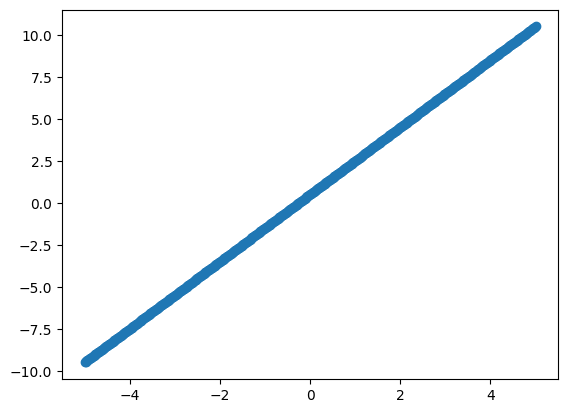

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x=xs, y=ys)

In [17]:
# Let's add some noise
import random
random.random() # return a random float value between 0 and 1

ys_noise = [my_function(x) + (random.random()-0.5)*2  for x in xs]

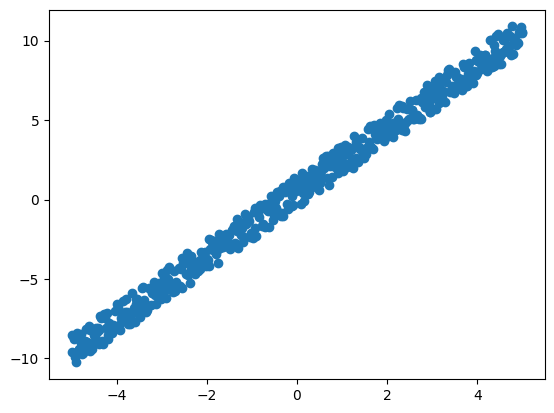

In [18]:
plt.scatter(xs, ys_noise)

In [26]:
# random is not actually complete random
# usually computers uses pseudo-random

# random.random() in fact has its destiny. It will always return same value
# if the seed is the same

random.seed(0)
[random.random() for _ in range(10)]


[0.8444218515250481,
 0.7579544029403025,
 0.420571580830845,
 0.25891675029296335,
 0.5112747213686085,
 0.4049341374504143,
 0.7837985890347726,
 0.30331272607892745,
 0.4765969541523558,
 0.5833820394550312]

In [22]:
[random.random() for _ in range(10)]


[0.47700977655271704,
 0.8653099277716401,
 0.2604923103919594,
 0.8050278270130223,
 0.5486993038355893,
 0.014041700164018955,
 0.7197046864039541,
 0.39882354222426875,
 0.824844977148233,
 0.6681532012318508]

In [27]:
a = random.random()
b = random.random()

ys_noise = [my_function(x) + (random.random()-0.5)  for x in xs]


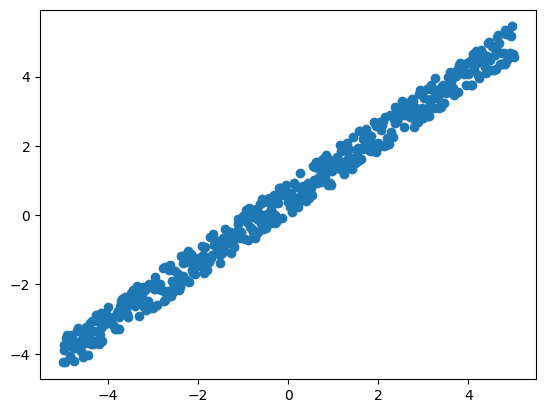

In [28]:
plt.scatter(xs, ys_noise)

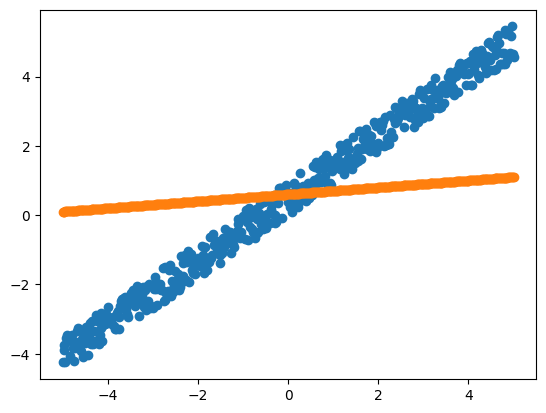

In [38]:
a_est = 0.1
b_est = 0.6
def my_estimation(x):
  return a_est * x + b_est

estimations = [my_estimation(x) for x in xs]

plt.scatter(xs, ys_noise)
plt.scatter(xs, estimations)

In [40]:

# How can we calculates how good our estimation is?
def cal_error(pred, target):
  # target is the correct answer, desired output
  # prediction is the output of your current model
  return abs(pred-target)

cal_error(1, 1.1), cal_error(1.2, 1.1)

(0.10000000000000009, 0.09999999999999987)

In [44]:
# compare every value in y_noise and estimation
# we have to compare values in the same idx

errors = []
for i in range(len(ys_noise)):
  target = ys_noise[i]
  pred = estimations[i]
  error = cal_error(pred, target)
  errors.append(error)

errors = [cal_error(pred, target) for target, pred in zip(ys_noise, estimations)]

sum(errors) / len(errors) # mean value of errors

2.0281079525463297

In [62]:
a_est = 0.91
b_est = 0.5

estimations = [my_estimation(x) for x in xs]
errors = [cal_error(pred, target) for target, pred in zip(ys_noise, estimations)]
sum(errors) / len(errors)

0.2567998653631906

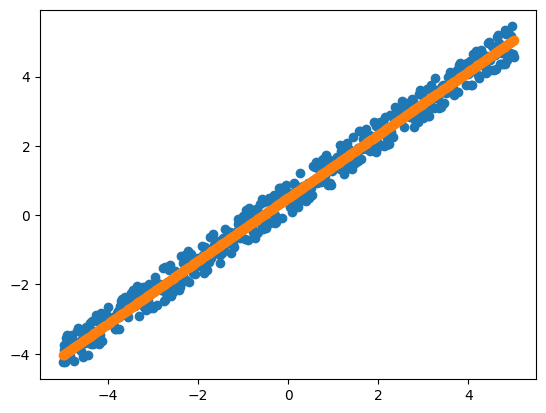

In [63]:
plt.scatter(xs, ys_noise)
plt.scatter(xs, estimations)

In [67]:
class ComplexFunction:
  def __init__(self):
    self.param_a = random.random()
    self.param_b = random.random()
    self.param_c = random.random()

  def __call__(self, x):
    return x * self.param_a + x**self.param_c + x**2 * self.param_b + (random.random()-0.5) * 2

comp_func = ComplexFunction()


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


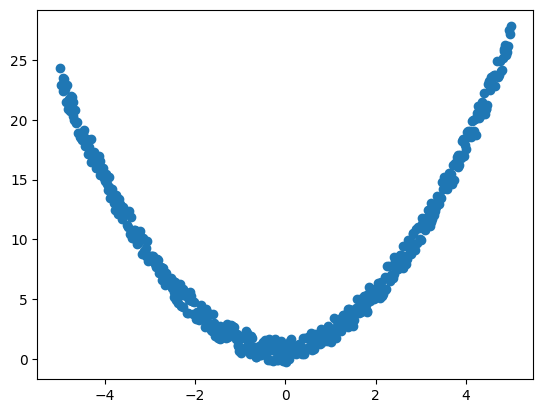

In [68]:
ys_comp = [comp_func(x) for x in xs]
plt.scatter(xs, ys_comp)

In [ ]:
import torch


### Update plot in for loop
```
from IPython import display
import matplotlib.pyplot as plt

for i in range(10):
  plt.plot([i], [i], 'o')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.close()
```

## 2. Regression with Multiple Variables
  - e.g.: Predict wine quality based on features like acidity, sugar content, and alcohol level.